import requests
from bs4 import BeautifulSoup

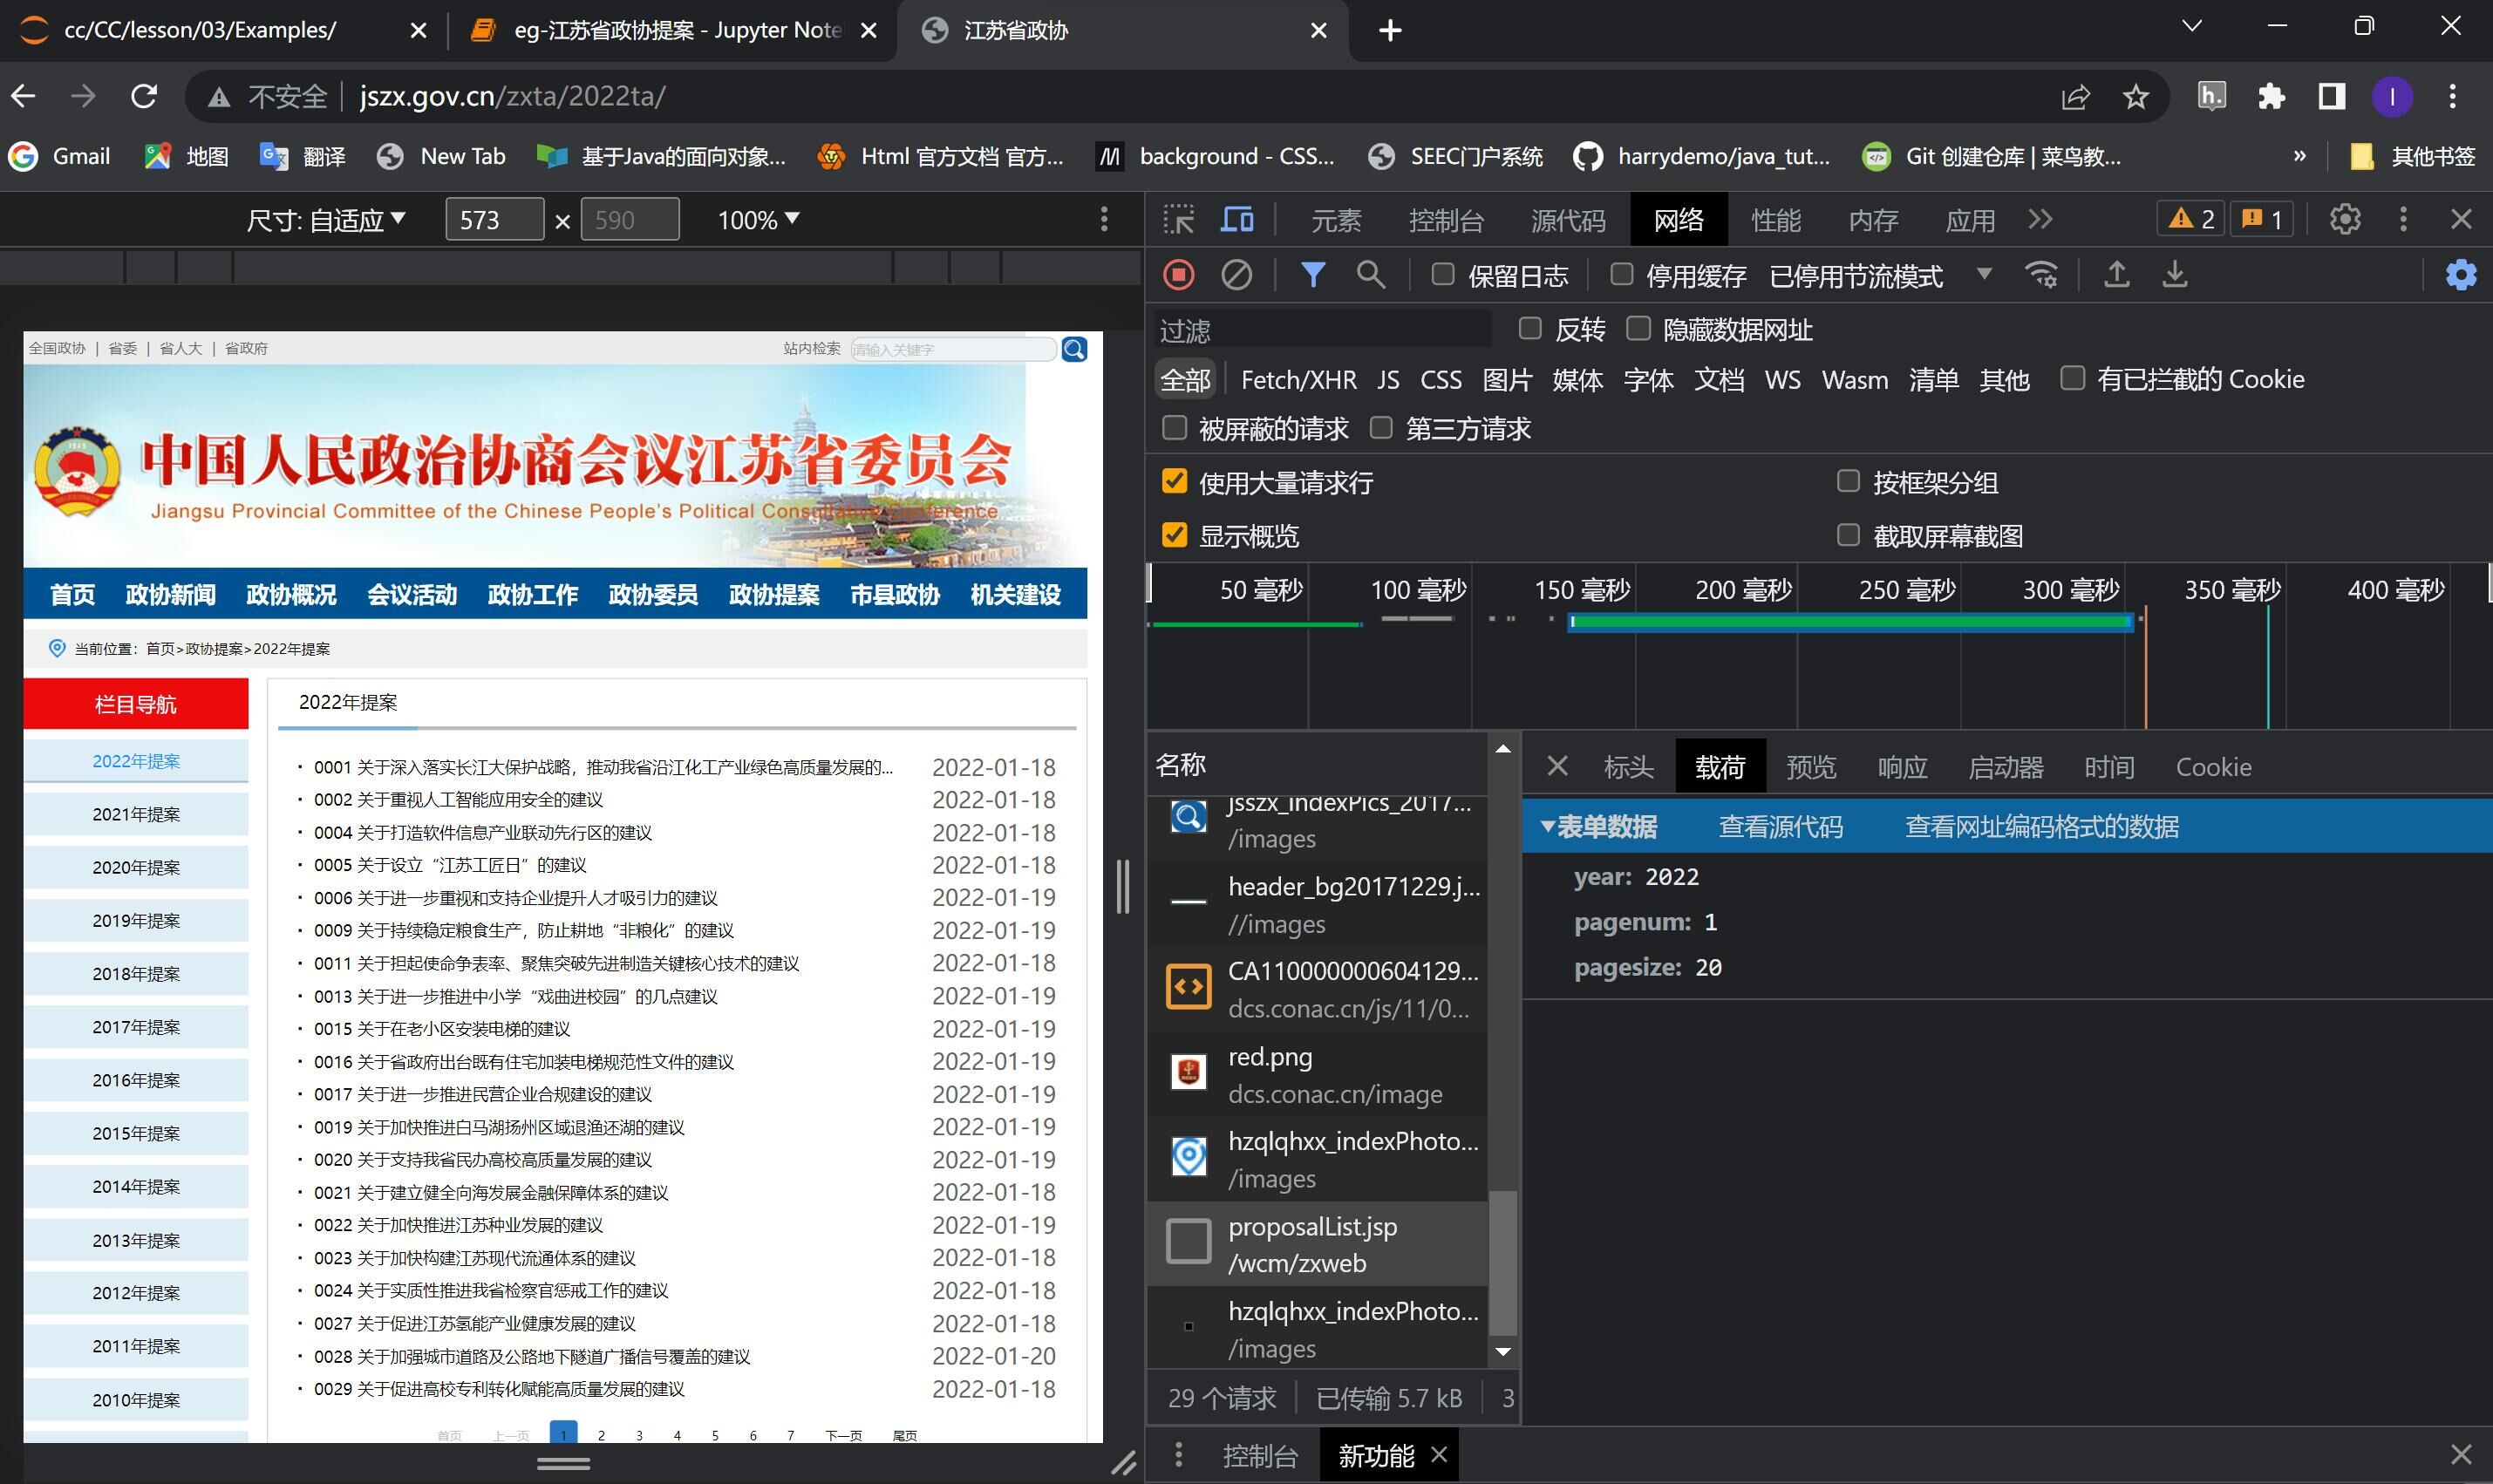

network-proposalList.jsp-header-data_form

http://www.jszx.gov.cn/zxta/2019ta/

In [2]:
form_data = {'year':2019,
             'pagenum':1,
             'pagesize':20
}
url = 'http://www.jszx.gov.cn/wcm/zxweb/proposalList.jsp' #右键复制链接
content = requests.get(url, form_data)
content.encoding = 'utf-8'
js = content.json() # 转换为JSON对象

In [6]:
js['data']['totalcount']

'646'

### 了解JSON对象
#### 一共包含三个字段：totalcount、pagecount、list
#### list是一个包含多个字典的列表：每个字典都包含了若干个字段，如 
'rownum'、'proposal_number'、'reason'、'pkid'、'year'、
'publish_time'、'personnel_name' 和 'type' 等

In [5]:
for key in js:
    value = js[key]
    print(key,value)

data {'totalcount': '646', 'pagecount': 33.0, 'list': [{'rownum': 1, 'proposal_number': '0001', 'reason': '关于完善城市环卫公厕指引系统的建议', 'pkid': '18b1b347f9e34badb8934c2acec80e9e', 'year': '2019', 'publish_time': '2019-01-12 16:04:48', 'personnel_name': '邹正', 'type': '城乡建设'}, {'rownum': 2, 'proposal_number': '0002', 'reason': '关于加强老小区光纤化改造的建议', 'pkid': 'da43aae2378244faa961dd1224d1343e', 'year': '2019', 'publish_time': '2019-01-12 16:04:48', 'personnel_name': '省政协学习委员会', 'type': '城乡建设'}, {'rownum': 3, 'proposal_number': '0004', 'reason': '加强科技创新，推动制造业转型升级', 'pkid': 'c0a1626a1bb744ebb0852cf25b21fb0a', 'year': '2019', 'publish_time': '2019-01-12 15:42:19', 'personnel_name': '许文前', 'type': '工业商贸'}, {'rownum': 4, 'proposal_number': '0005', 'reason': '关于落实金融政策、促进民营企业高质量发展的建议', 'pkid': 'ce60d71296764cfe997d62bb2c0990af', 'year': '2019', 'publish_time': '2019-01-12 16:21:46', 'personnel_name': '段绪强', 'type': '财税金融'}, {'rownum': 5, 'proposal_number': '0006', 'reason': '关于主基地航空公司协同东部机场集团发展的建议', 'pkid': '

In [11]:
dat = js['data']['list']
pagenum = js['data']['pagecount']
pagenum = int(pagenum)

In [12]:
for i in range(2, pagenum+1):
    # 获取每一页的数据
    print(i)
    form_data['pagenum'] = i
    content = requests.get(url, form_data)
    content.encoding = 'utf-8'
    js = content.json()
    for j in js['data']['list']:
        # 将'data'字段下的'list'字段的值的每一个元素添加到dat列表中
        dat.append(j)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


In [13]:
len(dat)

646

In [14]:
dat[0]

{'rownum': 1,
 'proposal_number': '0001',
 'reason': '关于完善城市环卫公厕指引系统的建议',
 'pkid': '18b1b347f9e34badb8934c2acec80e9e',
 'year': '2019',
 'publish_time': '2019-01-12 16:04:48',
 'personnel_name': '邹正',
 'type': '城乡建设'}

In [16]:
import pandas as pd

df = pd.DataFrame(dat)
df.head()

,rownum,proposal_number,reason,pkid,year,publish_time,personnel_name,type
0,1,0001,关于完善城市环卫公厕指引系统的建议,18b1b347f9e34badb8934c2acec80e9e,2019,2019-01-12 16:04:48,邹正,城乡建设
1,2,0002,关于加强老小区光纤化改造的建议,da43aae2378244faa961dd1224d1343e,2019,2019-01-12 16:04:48,省政协学习委员会,城乡建设
2,3,0004,加强科技创新，推动制造业转型升级,c0a1626a1bb744ebb0852cf25b21fb0a,2019,2019-01-12 15:42:19,许文前,工业商贸
3,4,0005,关于落实金融政策、促进民营企业高质量发展的建议,ce60d71296764cfe997d62bb2c0990af,2019,2019-01-12 16:21:46,段绪强,财税金融
4,5,0006,关于主基地航空公司协同东部机场集团发展的建议,8b5fb5a7d86547899835a12af398ffc7,2019,2019-01-12 15:42:19,侯建军,工业商贸


In [17]:
df.groupby('type').size()

type
农林水利     32
医卫体育     49
城乡建设     33
工业商贸     85
政治建设     23
教育事业     64
文化宣传     39
法制建设     30
社会事业    100
科学技术     27
经济发展     66
统战综合      8
财税金融     24
资源环境     66
dtype: int64

In [19]:
df.groupby('publish_time').size()

publish_time
2019-01-12 15:42:19     9
2019-01-12 15:47:38     5
2019-01-12 16:04:48     6
2019-01-12 16:17:57     4
2019-01-12 16:21:46     4
                       ..
2019-12-06 12:44:13     9
2019-12-06 16:00:39    10
2019-12-06 16:01:53     1
2019-12-06 16:04:06     9
2019-12-06 16:05:16     2
Length: 253, dtype: int64

### 抓取提案内容

In [20]:
url_base = 'http://www.jszx.gov.cn/wcm/zxweb/proposalInfo.jsp?pkid='
urls = [url_base + i  for i in df['pkid']]

In [21]:
import sys
def flushPrint(www):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % www)
    sys.stdout.flush()
    
text = []
for k, i in enumerate(urls):
    flushPrint(k)
    content = requests.get(i)
    content.encoding = 'utf-8'
    js = content.json()
    js = js['data']['binfo']['_content']
    soup = BeautifulSoup(js, 'html.parser') 
    text.append(soup.text)

645

In [22]:
len(text)

646

In [23]:
df['content'] = text

In [24]:
df.head()

,rownum,proposal_number,reason,pkid,year,publish_time,personnel_name,type,content
0,1,0001,关于完善城市环卫公厕指引系统的建议,18b1b347f9e34badb8934c2acec80e9e,2019,2019-01-12 16:04:48,邹正,城乡建设,调研情况： 2015 年 4 月 1 日，习近平总书记首次提出要坚持不懈地推进“厕所革...
1,2,0002,关于加强老小区光纤化改造的建议,da43aae2378244faa961dd1224d1343e,2019,2019-01-12 16:04:48,省政协学习委员会,城乡建设,调研情况：近期，省政协学习委员会组织部分委员对我省信息通信业发展情况进行考察调研，总的感到，...
2,3,0004,加强科技创新，推动制造业转型升级,c0a1626a1bb744ebb0852cf25b21fb0a,2019,2019-01-12 15:42:19,许文前,工业商贸,调研情况： 早在2012年，美国国会的一份报告就声称，华为和中兴通讯可能涉嫌从事威胁美国...
3,4,0005,关于落实金融政策、促进民营企业高质量发展的建议,ce60d71296764cfe997d62bb2c0990af,2019,2019-01-12 16:21:46,段绪强,财税金融,调研情况：2018年，国家支持民营企业融资所出台的政策众多、且力度空前。这在一定程度上提振了...
4,5,0006,关于主基地航空公司协同东部机场集团发展的建议,8b5fb5a7d86547899835a12af398ffc7,2019,2019-01-12 15:42:19,侯建军,工业商贸,调研情况：2018年初，在呈报的题为《关于大力发展江苏民航补齐综合交通运输体系短板的几点建议...
